In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [2]:
df =pd.read_csv("C:\\Users\\kalpana\\Downloads\\glass.csv")

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df.iloc[:,1:])

In [5]:
df1

array([[ 0.28495326,  1.25463857, -0.69244192, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       [ 0.59181718,  0.63616803, -0.17046023, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       [ 0.14993314,  0.60142249,  0.19091171, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       ...,
       [ 1.16872135, -1.86551055,  1.15457021, ...,  2.95320036,
        -0.5864509 ,  2.01047778],
       [ 1.19327046, -1.86551055,  0.99396046, ...,  2.81208731,
        -0.5864509 ,  2.01047778],
       [ 1.00915211, -1.86551055,  1.27502753, ...,  3.01367739,
        -0.5864509 ,  2.01047778]])

In [6]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

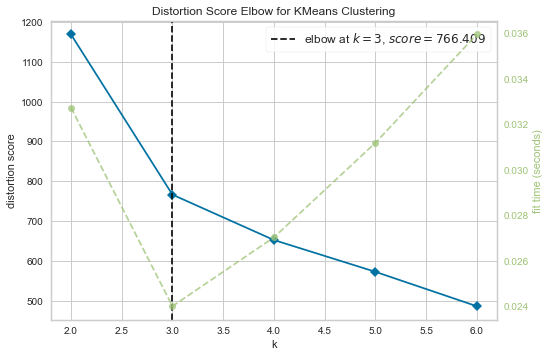

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(KMeans(),k=6)
visualizer.fit(df)
visualizer.show()

In [19]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(df)

KMeans(n_clusters=3, random_state=42)

In [20]:
clusters_new.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
#Assign clusters to the data set
df['labels'] = clusters_new.labels_

In [22]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,labels
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,2
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,2
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,2
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,2
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,1


In [23]:
df2=df.groupby('labels').agg(['mean']).reset_index()

In [24]:
df2

,labels,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.523800,12.624444,0.348889,1.338889,72.428889,0.292222,12.572778,0.175000,0.083333,3.166667
1,1,1.517077,14.297955,0.761364,2.029091,72.833864,0.587727,8.640455,0.740909,0.020455,6.522727
2,2,1.518095,13.242961,3.517829,1.288355,72.624276,0.495066,8.620395,0.011250,0.064474,1.651316


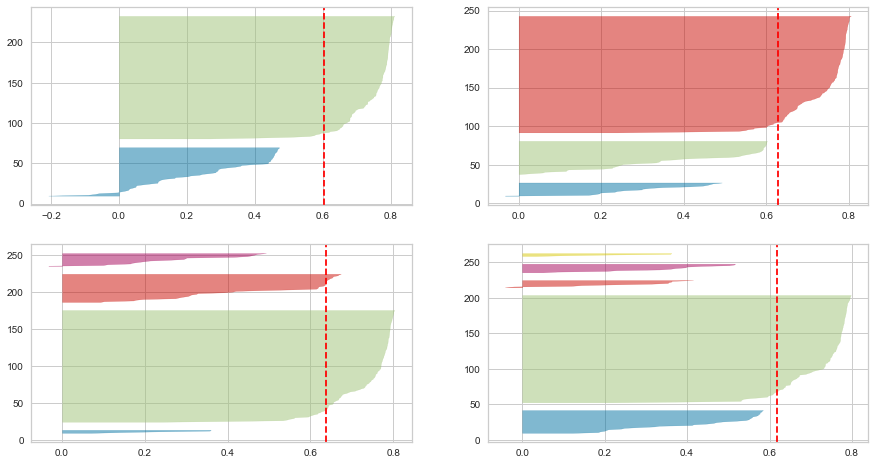

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df) 

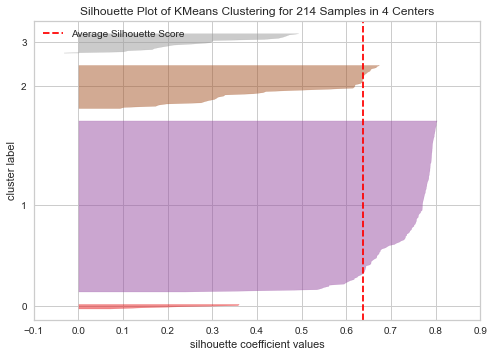

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 214 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [15]:
model_4clust = KMeans(n_clusters = 4, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(df)    
sil_visualizer.show()